# This python program that predicts houses fee by their features

In [66]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
df = pd.read_csv(r"C:\Users\aryan computer\Desktop\house.csv")
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Dollar
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [68]:
def char_fixer(data_frame, series_name):
    cnt=0
    for row in data_frame[series_name]:
        try:
            float(row) #changed to float to not flag NaNs or decimals.  
            pass
        except ValueError:
            data_frame.drop([cnt], inplace=True) #or assign to some other desired value
        cnt+=1
    data_frame[series_name] = data_frame[series_name].astype('float64', errors='raise')
    data_frame.reset_index(drop=True, inplace=True)

In [69]:
char_fixer(df,"Area")

In [70]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Dollar
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [71]:
cdf = df[["Area","Room","Dollar"]]

In [72]:
corr_matrix = cdf.corr().abs()

In [73]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [74]:
cdf.drop(to_drop, axis=1, inplace=True)

C:\Users\aryan computer\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


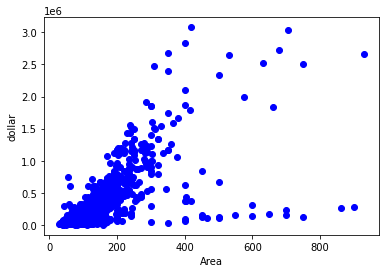

In [75]:
plt.scatter(cdf.Area ,cdf.Dollar ,color='blue')
plt.xlabel('Area')
plt.ylabel('dollar')
plt.show()

In [76]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
train.head()

,Area,Room,Dollar
1,60.0,1,61666.67
2,79.0,2,18333.33
3,95.0,2,30083.33
4,123.0,2,233333.33
6,87.0,2,20000.00


In [77]:
from numpy.core import multiarray

In [78]:
from sklearn.linear_model import LinearRegression


In [79]:
from sklearn import linear_model

In [80]:
regr = linear_model.LinearRegression()

In [81]:
x = np.asanyarray(train[["Area","Room"]])
y = np.asanyarray(train[['Dollar']])

In [82]:
from sklearn import preprocessing

In [83]:
le = preprocessing.LabelEncoder()

In [84]:
regr.fit(x,y)


LinearRegression()

In [85]:
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 2405.41206831 60067.35167688]]


In [86]:
y_hat= regr.predict(test[['Area','Room']])
x = np.asanyarray(test[['Area','Room',]])
y = np.asanyarray(test[['Dollar']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 26421033330.32
Variance score: 0.56


C:\Users\aryan computer\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
